# Moving Average Crossover Strategy

## Importing Data
### Stock: NVDA \ Period: 1Y, Interval: 1D

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

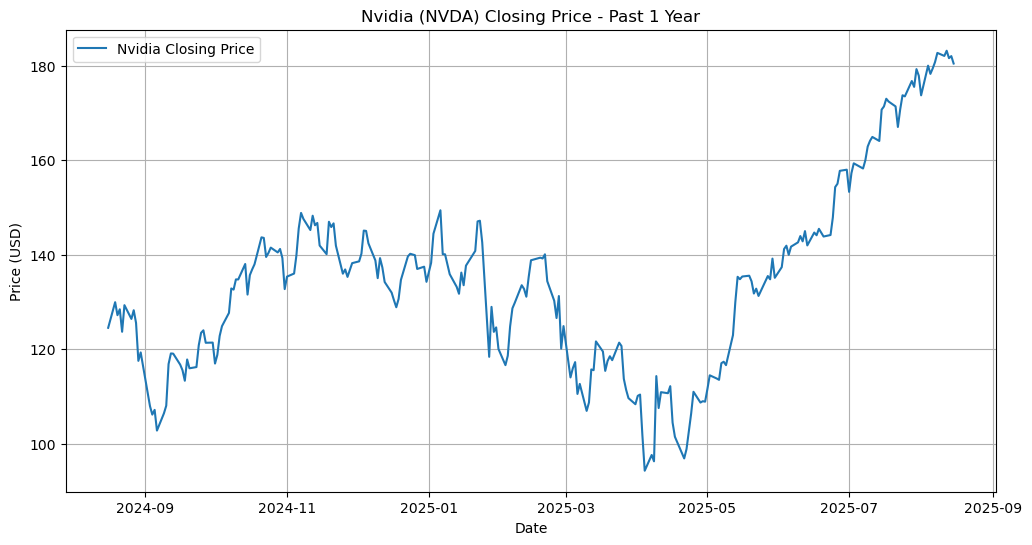

In [6]:
nvda = yf.Ticker("NVDA")

data = nvda.history(period = "1y", interval = "1d")

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Nvidia Closing Price')
plt.title('Nvidia (NVDA) Closing Price - Past 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## Strategy Implementation
### Buy then the short-term MA is lower than the long-term MA, sell when opposite

In [8]:
# for reference
print(data.head(3))

                                 Open        High         Low       Close  \
Date                                                                        
2024-08-16 00:00:00-04:00  121.901491  124.960523  121.141729  124.540657   
2024-08-19 00:00:00-04:00  124.240744  129.958939  123.381015  129.958939   
2024-08-20 00:00:00-04:00  128.359439  129.838983  125.850237  127.209808   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-08-16 00:00:00-04:00  302589900        0.0           0.0  
2024-08-19 00:00:00-04:00  318333600        0.0           0.0  
2024-08-20 00:00:00-04:00  300087400        0.0           0.0  


### Short-term MA = 10D, Long-term MA = 30D

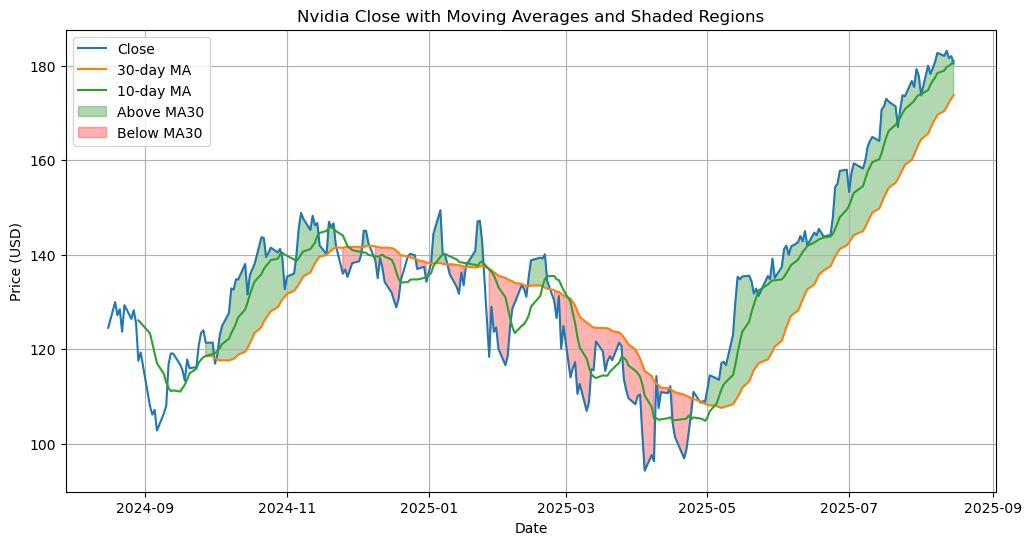

BUY at 121.41 on 2024-09-30
SELL at 138.22 on 2024-11-29, Trade Revenue: 1680.61
BUY at 149.41 on 2025-01-06
SELL at 118.40 on 2025-01-27, Trade Revenue: -3100.50
BUY at 139.21 on 2025-02-19
SELL at 114.04 on 2025-03-03, Trade Revenue: -2516.59
BUY at 113.81 on 2025-05-05
Final SELL at 180.45 on 2025-08-15, Trade Revenue: 6663.79

Total Revenue from strategy with volume 100: $2727.31


In [10]:
# Calculate moving averages
data['MA30'] = data['Close'].rolling(window=30).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA30'], label='30-day MA')
plt.plot(data.index, data['MA10'], label='10-day MA')

# Example: Shade region where Close > MA30
plt.fill_between(data.index, data['Close'], data['MA30'], 
                 where=(data['Close'] > data['MA30']),
                 color='green', alpha=0.3, label='Above MA30')

# Example: Shade region where Close < MA30
plt.fill_between(data.index, data['Close'], data['MA30'],
                 where=(data['Close'] < data['MA30']),
                 color='red', alpha=0.3, label='Below MA30')

plt.title("Nvidia Close with Moving Averages and Shaded Regions")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Generate signals
data['Signal'] = 0  # no position
data.loc[data['MA10'] > data['MA30'], 'Signal'] = 1  # buy signal
data.loc[data['MA10'] < data['MA30'], 'Signal'] = -1 # sell signal

# Initialize variables
position = 0
buy_price = 0
revenue = 0
volume = 100

# Iterate over rows to simulate trades
for i in range(len(data)):
    signal = data['Signal'].iloc[i]
    price = data['Close'].iloc[i]
    
    # Buy signal
    if signal == 1 and position == 0:
        buy_price = price
        position = 1
        print(f"BUY at {buy_price:.2f} on {data.index[i].date()}")
    
    # Sell signal
    elif signal == -1 and position == 1:
        sell_price = price
        trade_revenue = (sell_price - buy_price) * volume
        revenue += trade_revenue
        position = 0
        print(f"SELL at {sell_price:.2f} on {data.index[i].date()}, Trade Revenue: {trade_revenue:.2f}")

# Close any open position at the end
if position == 1:
    sell_price = data['Close'].iloc[-1]
    trade_revenue = (sell_price - buy_price) * volume
    revenue += trade_revenue
    print(f"Final SELL at {sell_price:.2f} on {data.index[-1].date()}, Trade Revenue: {trade_revenue:.2f}")

# Print total revenue
print(f"\nTotal Revenue from strategy with volume {volume}: ${revenue:.2f}")

### Short-term MA = 5D, Long-term MA = 50D

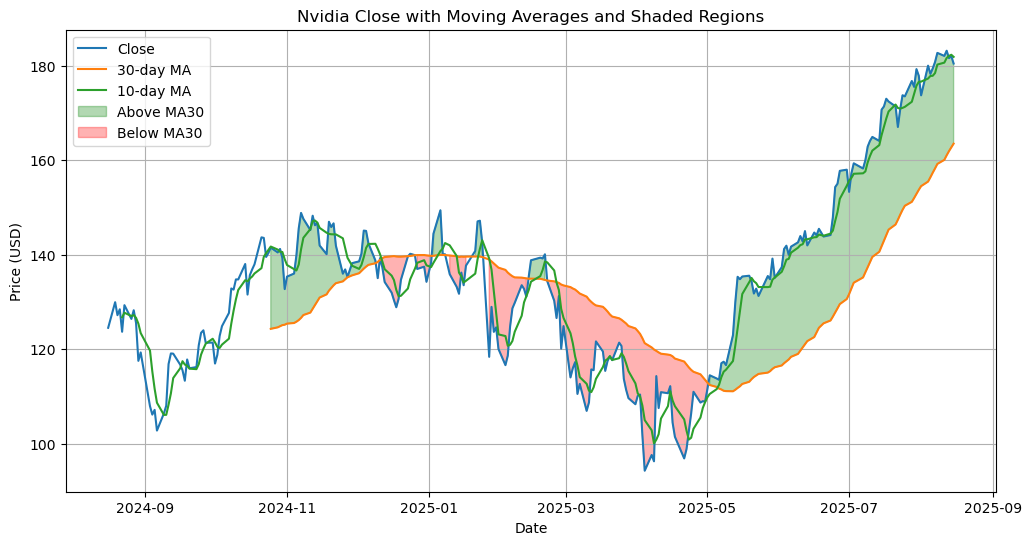

BUY at 141.51 on 2024-10-25
SELL at 137.32 on 2024-12-12, Trade Revenue: -418.96
BUY at 149.41 on 2025-01-06
SELL at 131.74 on 2025-01-14, Trade Revenue: -1766.71
BUY at 147.20 on 2025-01-23
SELL at 128.97 on 2025-01-28, Trade Revenue: -1822.71
BUY at 139.38 on 2025-02-18
SELL at 126.61 on 2025-02-25, Trade Revenue: -1276.79
BUY at 113.53 on 2025-05-06
Final SELL at 180.45 on 2025-08-15, Trade Revenue: 6691.79

Total Revenue from strategy with volume 100: $1406.62


In [12]:
# Calculate moving averages
data['MA30'] = data['Close'].rolling(window=50).mean()
data['MA10'] = data['Close'].rolling(window=5).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA30'], label='30-day MA')
plt.plot(data.index, data['MA10'], label='10-day MA')

# Example: Shade region where Close > MA30
plt.fill_between(data.index, data['Close'], data['MA30'], 
                 where=(data['Close'] > data['MA30']),
                 color='green', alpha=0.3, label='Above MA30')

# Example: Shade region where Close < MA30
plt.fill_between(data.index, data['Close'], data['MA30'],
                 where=(data['Close'] < data['MA30']),
                 color='red', alpha=0.3, label='Below MA30')

plt.title("Nvidia Close with Moving Averages and Shaded Regions")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Generate signals
data['Signal'] = 0  # no position
data.loc[data['MA10'] > data['MA30'], 'Signal'] = 1  # buy signal
data.loc[data['MA10'] < data['MA30'], 'Signal'] = -1 # sell signal

# Initialize variables
position = 0
buy_price = 0
revenue = 0
volume = 100

# Iterate over rows to simulate trades
for i in range(len(data)):
    signal = data['Signal'].iloc[i]
    price = data['Close'].iloc[i]
    
    # Buy signal
    if signal == 1 and position == 0:
        buy_price = price
        position = 1
        print(f"BUY at {buy_price:.2f} on {data.index[i].date()}")
    
    # Sell signal
    elif signal == -1 and position == 1:
        sell_price = price
        trade_revenue = (sell_price - buy_price) * volume
        revenue += trade_revenue
        position = 0
        print(f"SELL at {sell_price:.2f} on {data.index[i].date()}, Trade Revenue: {trade_revenue:.2f}")

# Close any open position at the end
if position == 1:
    sell_price = data['Close'].iloc[-1]
    trade_revenue = (sell_price - buy_price) * volume
    revenue += trade_revenue
    print(f"Final SELL at {sell_price:.2f} on {data.index[-1].date()}, Trade Revenue: {trade_revenue:.2f}")

# Print total revenue
print(f"\nTotal Revenue from strategy with volume {volume}: ${revenue:.2f}")

### Finding optimal range for ltMA and stMA

In [14]:
revenues = []
for lt in range(25,101):
    for st in range(5,21):
        data['MA30'] = data['Close'].rolling(window=lt).mean()
        data['MA10'] = data['Close'].rolling(window=st).mean()

        # Generate signals
        data['Signal'] = 0  # no position
        data.loc[data['MA10'] > data['MA30'], 'Signal'] = 1  # buy signal
        data.loc[data['MA10'] < data['MA30'], 'Signal'] = -1 # sell signal
        
        # Initialize variables
        position = 0
        buy_price = 0
        revenue = 0
        volume = 100
        
        # Iterate over rows to simulate trades
        for i in range(len(data)):
            signal = data['Signal'].iloc[i]
            price = data['Close'].iloc[i]
            
            # Buy signal
            if signal == 1 and position == 0:
                buy_price = price
                position = 1
                # print(f"BUY at {buy_price:.2f} on {data.index[i].date()}")
            
            # Sell signal
            elif signal == -1 and position == 1:
                sell_price = price
                trade_revenue = (sell_price - buy_price) * volume
                revenue += trade_revenue
                position = 0
                # print(f"SELL at {sell_price:.2f} on {data.index[i].date()}, Trade Revenue: {trade_revenue:.2f}")
        
        # Close any open position at the end
        if position == 1:
            sell_price = data['Close'].iloc[-1]
            trade_revenue = (sell_price - buy_price) * volume
            revenue += trade_revenue
            # print(f"Final SELL at {sell_price:.2f} on {data.index[-1].date()}, Trade Revenue: {trade_revenue:.2f}")
        
        # Print total revenue
        # print(f"Total Revenue from strategy with volume {volume}, lt {lt}, st {st}: ${revenue:.2f}")
        revenues.append([lt, st, round(revenue, 2)])




# find largest combo

maxRev = 0
optimal_lt = 0
optimal_st = 0

for revenue in revenues:
    if revenue[2] > maxRev:
        maxRev = revenue[2]
        optimal_lt = revenue[0]
        optimal_st = revenue[1]

print(f"Optimal long-term duration: {optimal_lt} and short-term duration: {optimal_st}. \
        \n Generated Revenue: {maxRev}")

Optimal long-term duration: 32 and short-term duration: 16.         
 Generated Revenue: 7672.42


## Leading Signal Implementation

Revenue MA: $-3036.60
Revenue RSI: $7185.78
Revenue Combined MA + RSI: $43.40


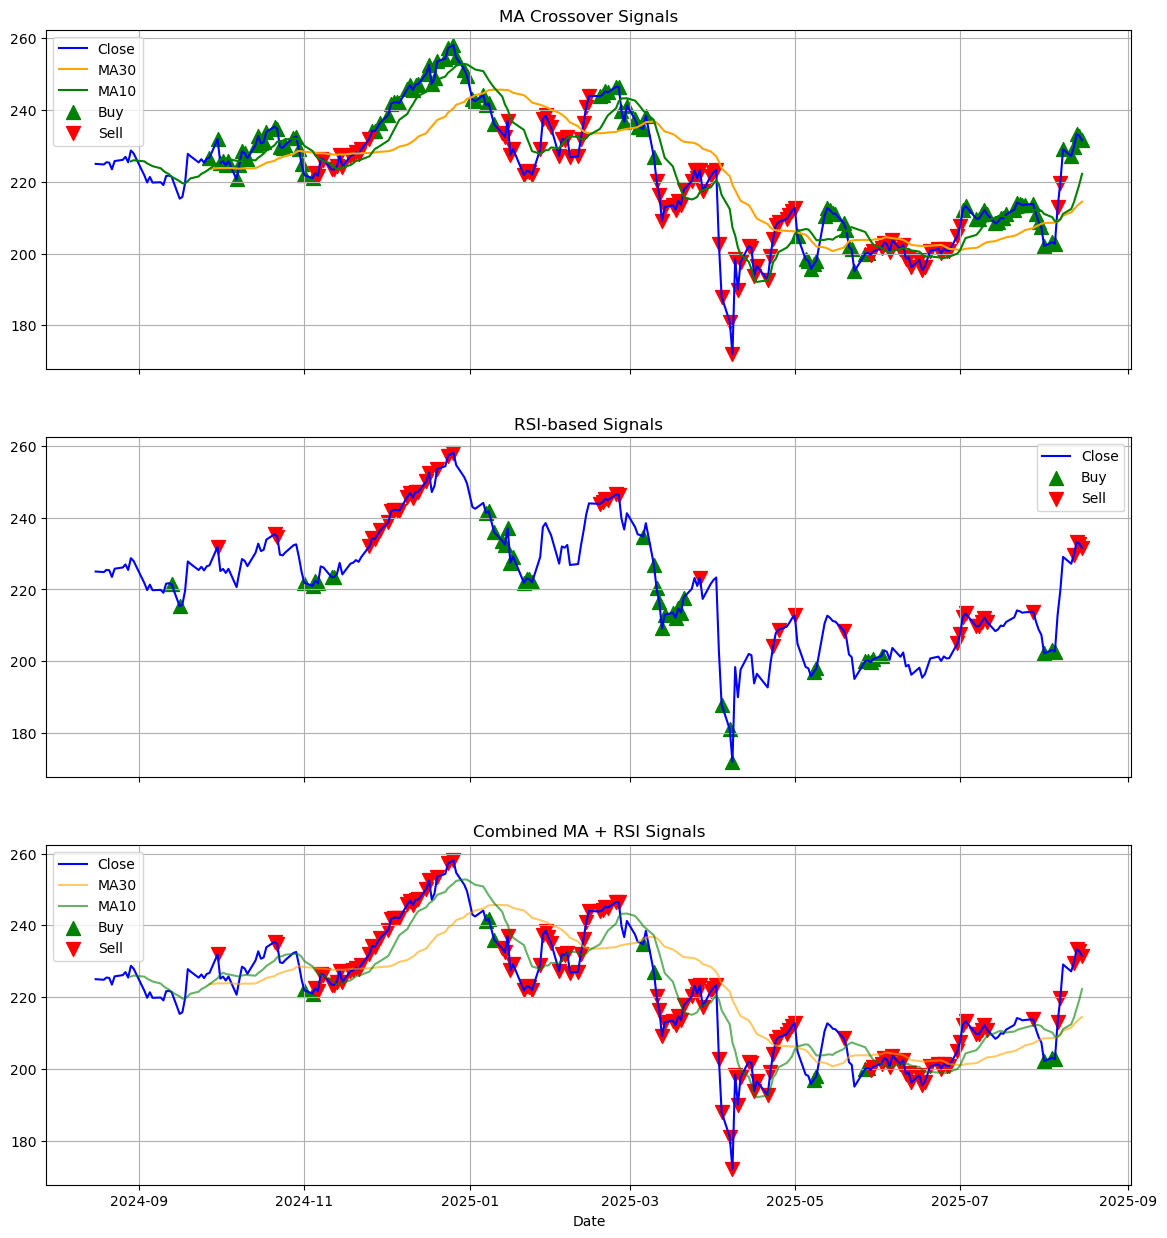

In [64]:
# --- Calculate MAs ---
data['MA30'] = data['Close'].rolling(window=30).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

# --- Calculate RSI10 ---
delta = data['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=10).mean()
avg_loss = loss.rolling(window=10).mean()
rs = avg_gain / avg_loss
data['RSI10'] = 100 - (100 / (1 + rs))

# --- Generate MA crossover signals ---
data['Signal_MA'] = 0
data.loc[data['MA10'] > data['MA30'], 'Signal_MA'] = 1   # Buy
data.loc[data['MA10'] < data['MA30'], 'Signal_MA'] = -1  # Sell

# --- Generate RSI signals ---
data['Signal_RSI'] = 0
data.loc[data['RSI10'] < 30, 'Signal_RSI'] = 1   # Buy
data.loc[data['RSI10'] > 70, 'Signal_RSI'] = -1  # Sell

# --- Generate Combined signals ---
data['Signal_Both'] = 0
data.loc[(data['Signal_MA'] == 1) & (data['Signal_RSI'] == 1), 'Signal_Both'] = 1
data.loc[(data['Signal_MA'] == -1) | (data['Signal_RSI'] == -1), 'Signal_Both'] = -1

# --- Function to calculate revenue ---
def calculate_revenue(df, signal_col, volume=100):
    position = 0
    buy_price = 0
    revenue = 0
    for i in range(len(df)):
        signal = df[signal_col].iloc[i]
        price = df['Close'].iloc[i]
        if signal == 1 and position == 0:
            buy_price = price
            position = 1
        elif signal == -1 and position == 1:
            revenue += (price - buy_price) * volume
            position = 0
    # Close open position
    if position == 1:
        revenue += (df['Close'].iloc[-1] - buy_price) * volume
    return revenue

revenue_ma = calculate_revenue(data, 'Signal_MA')
revenue_rsi = calculate_revenue(data, 'Signal_RSI')
revenue_both = calculate_revenue(data, 'Signal_Both')

print(f"Revenue MA: ${revenue_ma:.2f}")
print(f"Revenue RSI: ${revenue_rsi:.2f}")
print(f"Revenue Combined MA + RSI: ${revenue_both:.2f}")

# --- Plotting ---
fig, axs = plt.subplots(3, 1, figsize=(14,15), sharex=True)

# 1. MA crossover
axs[0].plot(data.index, data['Close'], label='Close', color='blue')
axs[0].plot(data.index, data['MA30'], label='MA30', color='orange')
axs[0].plot(data.index, data['MA10'], label='MA10', color='green')
axs[0].scatter(data.index[data['Signal_MA']==1], data['Close'][data['Signal_MA']==1], 
               marker='^', color='green', s=100, label='Buy')
axs[0].scatter(data.index[data['Signal_MA']==-1], data['Close'][data['Signal_MA']==-1],
               marker='v', color='red', s=100, label='Sell')
axs[0].set_title('MA Crossover Signals')
axs[0].legend()
axs[0].grid(True)

# 2. RSI signals
axs[1].plot(data.index, data['Close'], label='Close', color='blue')
axs[1].scatter(data.index[data['Signal_RSI']==1], data['Close'][data['Signal_RSI']==1], 
               marker='^', color='green', s=100, label='Buy')
axs[1].scatter(data.index[data['Signal_RSI']==-1], data['Close'][data['Signal_RSI']==-1],
               marker='v', color='red', s=100, label='Sell')
axs[1].set_title('RSI-based Signals')
axs[1].legend()
axs[1].grid(True)

# 3. Combined MA + RSI signals
axs[2].plot(data.index, data['Close'], label='Close', color='blue')
axs[2].plot(data.index, data['MA30'], label='MA30', color='orange', alpha=0.6)
axs[2].plot(data.index, data['MA10'], label='MA10', color='green', alpha=0.6)
axs[2].scatter(data.index[data['Signal_Both']==1], data['Close'][data['Signal_Both']==1], 
               marker='^', color='green', s=100, label='Buy')
axs[2].scatter(data.index[data['Signal_Both']==-1], data['Close'][data['Signal_Both']==-1],
               marker='v', color='red', s=100, label='Sell')
axs[2].set_title('Combined MA + RSI Signals')
axs[2].legend()
axs[2].grid(True)

plt.xlabel('Date')
plt.show()